In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from activ import load_data
from PyUoI.UoINMF import UoINMF
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from activ.data_normalization import data_normalization
from scipy.spatial.distance import pdist
from sklearn.model_selection import KFold
import h5py
import scipy.cluster.hierarchy as _sch
import seaborn as sns
from seaborn import clustermap
import itertools
sns.set(color_codes=True)
import pandas as pd

In [21]:
path = '/Users/ahyeon/Desktop/activ/results/no_transform/bm_drop_0_result.h5'
f = h5py.File(path, 'r')
umap_dims = f['umap_dimensions'][:]
emb = f['umap_embeddings'][:]
scale = f['umap_embeddings_dimscale'][:]


In [73]:
nmfdata = load_data(uoinmf=True)
nmf_bm = nmfdata.biomarkers

In [22]:
for dim in umap_dims:
    all_dmat = np.zeros((30381,50))
    for x in range(emb.shape[0]):
        dmat = pdist(emb[x][:,scale==dim], metric='euclidean')
        all_dmat[:,x] = dmat
    mean = all_dmat.mean(axis=1)
mean.shape

(30381,)

In [102]:
numclusters = 30
labels = _sch.cut_tree(_sch.linkage(mean, method='ward'), numclusters)

In [103]:
nmf_bm = pd.DataFrame(nmf_bm)
nmf_bm['labels'] = labels

In [104]:
nmf_bm

,0,1,2,3,4,5,labels
0,0.000000,0.000000,0.000000,0.000000,0.467335,3.325565,0
1,0.594937,0.000000,0.835575,0.026460,3.805326,0.000000,1
2,0.000000,0.000000,2.575281,0.000000,3.083000,0.389653,2
3,0.000000,0.000000,0.000000,1.477899,3.518571,0.000000,3
4,0.000000,0.000000,0.000000,1.072607,3.058273,0.590644,4
5,0.000000,0.000000,0.210922,0.000000,0.410988,3.414423,5
6,2.518367,0.724753,0.329590,0.074267,3.584900,0.000000,6
7,0.000000,0.237997,1.432537,1.098274,3.248762,0.000000,7
8,3.024763,0.000000,0.122587,0.000000,1.774095,0.000000,8
9,0.091337,0.067609,0.000000,1.463081,3.807594,0.000000,6


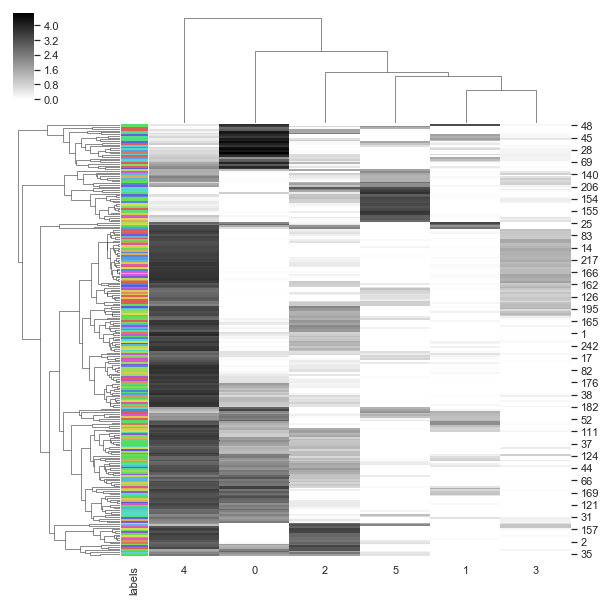

In [105]:
labels = nmf_bm.pop("labels")
lut = dict(zip(labels.unique(), sns.hls_palette(len(set(labels)))))
row_colors = labels.map(lut)
sns.clustermap(nmf_bm, row_colors=row_colors, cmap='binary')

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    

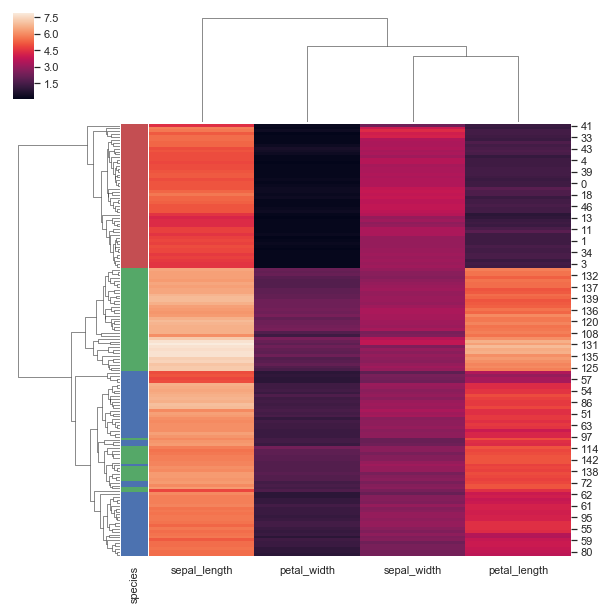

In [91]:
sns.set(color_codes=True)
iris = sns.load_dataset("iris")
print(iris)
species = iris.pop("species")
print(type(species))

lut = dict(zip(species.unique(), "rbg"))
print(lut)
row_colors = species.map(lut)
g = sns.clustermap(iris, row_colors=row_colors)